<a href="https://colab.research.google.com/github/daivik05/Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation/blob/main/Classification_and_severity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , auc
from sklearn.model_selection import train_test_split

import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

from keras.applications import MobileNetV2
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D
!pip install tensorflow

In [2]:
repo_name = 'Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation'
repo_url = f'https://github.com/daivik05/Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation'  # Replace your_username
!git clone $repo_url


fatal: destination path 'Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation' already exists and is not an empty directory.


In [3]:
project_dir = f'/content/{repo_name}'
%cd $project_dir

/content/Cereal_plant_disease_classification_with_severity_scoring_and_treatment_recommendation


In [4]:
train_path = 'train/'

In [5]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
 train_path,
    batch_size=256,
  image_size=(224,224), shuffle=True
)

Found 4715 files belonging to 10 classes.


In [6]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [7]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # or 'binary'
    subset='training'
)


Found 3775 images belonging to 10 classes.


In [8]:
for img, label in train_generator:
    print("Training Batch Shapes:", img.shape, label.shape)
    break

Training Batch Shapes: (32, 224, 224, 3) (32, 10)


In [9]:
train_generator.class_indices

{'corn_Blight': 0,
 'corn_Common_Rust': 1,
 'corn_Gray_Leaf_Spot': 2,
 'corn_Healthy': 3,
 'rice_Bacterial leaf blight': 4,
 'rice_Brown spot': 5,
 'rice_Leaf smut': 6,
 'wheat_leaf_Healthy': 7,
 'wheat_leaf_septoria': 8,
 'wheat_leaf_stripe_rust': 9}

In [10]:
len(train_data.class_names)

10

In [11]:
class_labels = train_data.class_names
class_labels

['corn_Blight',
 'corn_Common_Rust',
 'corn_Gray_Leaf_Spot',
 'corn_Healthy',
 'rice_Bacterial leaf blight',
 'rice_Brown spot',
 'rice_Leaf smut',
 'wheat_leaf_Healthy',
 'wheat_leaf_septoria',
 'wheat_leaf_stripe_rust']

In [12]:
for img, label in train_generator:
    #print(img)
    print(label)
    break

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [13]:
label[10]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
len(class_labels)

10

In [16]:
from tensorflow.keras.layers import Concatenate, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

classification_output = GlobalAveragePooling2D()(base_model.output)
classification_output = Dense(100, activation='relu')(classification_output)
classification_output = Dense(len(class_labels), activation='softmax', name='classification_output')(classification_output)

classification_model = Model(inputs=base_model.input, outputs=classification_output)
classification_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Compile the model
classification_model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
                              metrics=['accuracy'])

# Print model summary
classification_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [18]:
# Define data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)

# Compile the model
classification_model.compile(optimizer='adam',
                              loss=['sparse_categorical_crossentropy', 'binary_crossentropy'],
                              loss_weights=[1.0, 0.5],
                              metrics=['accuracy'])

# Train the model with validation data
history = classification_model.fit(
    train_generator,
    epochs=10,
    verbose=1,
    validation_data=validation_generator
)


Found 3775 images belonging to 10 classes.
Found 940 images belonging to 10 classes.
Epoch 1/10
118/118 [==============================] - 121s 966ms/step - loss: 0.4874 - accuracy: 0.8289 - val_loss: 0.3143 - val_accuracy: 0.8872
Epoch 2/10
118/118 [==============================] - 112s 945ms/step - loss: 0.2396 - accuracy: 0.9081 - val_loss: 0.2975 - val_accuracy: 0.8904
Epoch 3/10
118/118 [==============================] - 110s 937ms/step - loss: 0.2080 - accuracy: 0.9189 - val_loss: 0.2866 - val_accuracy: 0.8979
Epoch 4/10
118/118 [==============================] - 112s 953ms/step - loss: 0.1711 - accuracy: 0.9311 - val_loss: 0.2338 - val_accuracy: 0.9074
Epoch 5/10
118/118 [==============================] - 111s 939ms/step - loss: 0.1556 - accuracy: 0.9436 - val_loss: 0.2000 - val_accuracy: 0.9255
Epoch 6/10
118/118 [==============================] - 111s 941ms/step - loss: 0.1344 - accuracy: 0.9489 - val_loss: 0.2138 - val_accuracy: 0.9298
Epoch 7/10
118/118 [===================

In [21]:
loss,acc = classification_model.evaluate(train_generator)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

118/118 [==============================] - 94s 791ms/step - loss: 0.0813 - accuracy: 0.9679
Loss on Train data: 0.08132047206163406
Accuracy on Train data: 0.9679470062255859


In [22]:

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

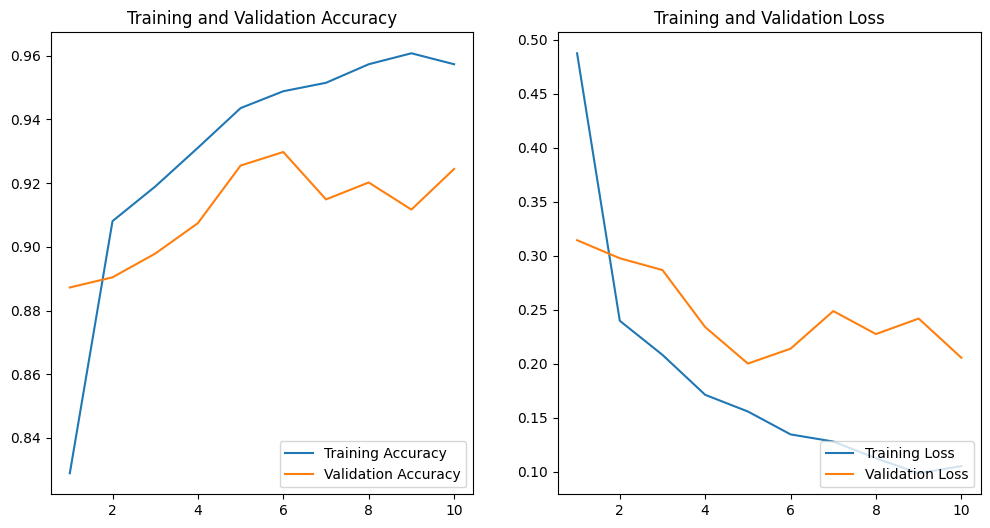

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Ensure that acc, val_acc, loss, and val_loss have the same length
assert len(acc) == len(val_acc) == len(loss) == len(val_loss)

EPOCHS = len(acc)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), acc, label="Training Accuracy")
plt.plot(range(1, EPOCHS + 1), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), loss, label="Training Loss")
plt.plot(range(1, EPOCHS + 1), val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()


In [35]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image


def segment_disease(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, binary_mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    return binary_mask


def calculate_percentage_affected(mask):
    total_pixels = mask.shape[0] * mask.shape[1]
    affected_pixels = np.count_nonzero(mask)
    percentage_affected = 100-(affected_pixels / total_pixels) * 100
    return percentage_affected

def segment_predict_and_calculate_percentage(img_path, model, class_labels):

    img = cv2.imread(img_path)


    disease_mask = segment_disease(img)


    percentage_affected = calculate_percentage_affected(disease_mask)


    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0


    predictions = classification_model.predict(img_array)
    predicted_class = class_labels[np.argmax(predictions[0])]

    return predicted_class, percentage_affected


img_path = "train/rice_Leaf smut/DSC_0293.JPG"
predicted_class, percentage_affected = segment_predict_and_calculate_percentage(img_path, classification_model, class_labels)
print("Predicted Class:", predicted_class)
print("Percentage of Affected Area:", percentage_affected)


1/1 [==============================] - 0s 21ms/step
Predicted Class: rice_Leaf smut
Percentage of Affected Area: 1.056498689960435


In [32]:
classification_model.save("classification and severity.h5")
